<a href="https://colab.research.google.com/github/Arafat1962/Spam-mail-detection/blob/main/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
raw_mails = pd.read_csv('/content/mail_data.csv')
print(raw_mails)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
print(raw_mails.shape)
print(raw_mails.columns)

(5572, 2)
Index(['Category', 'Message'], dtype='object')


In [6]:
raw_mails.drop_duplicates(inplace = True)

In [7]:
raw_mails.shape

(5157, 2)

In [8]:
mails = raw_mails.where(pd.notnull(raw_mails), '')
print(mails.isnull().sum())

Category    0
Message     0
dtype: int64


In [9]:
mails.loc[mails['Category'] == 'spam', 'Category'] = 0
mails.loc[mails['Category'] == 'ham', 'Category'] = 1

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mails['Message'], mails['Category'], test_size = 0.2, random_state = 3)
#print(msg)
print(x_train.shape)
print(x_test.shape)

(4125,)
(1032,)


In [12]:
#print(mails['Category'])
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = True)

x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)
#print(x_train)
#print(x_train_features)
#print(x_test_features)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

Naive Bayes MultiNomial

In [13]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(x_train_features, y_train)

In [14]:
print(classifier.predict(x_train_features))
print(y_train.values)


[1 1 0 ... 1 1 1]
[1 1 0 ... 1 1 1]


In [15]:
pred = classifier.predict(x_train_features)
#print(classification_report(y_train, pred))
print(classification_report(pred, y_train))
print('Confusion Matrix : \n', confusion_matrix(y_train, pred))
print('\n Accuracy on training data using MultiNomial Model:', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       420
           1       1.00      0.98      0.99      3705

    accuracy                           0.98      4125
   macro avg       0.92      0.99      0.95      4125
weighted avg       0.98      0.98      0.98      4125

Confusion Matrix : 
 [[ 420   82]
 [   0 3623]]

 Accuracy on training data using MultiNomial Model: 0.9801212121212122


In [16]:
print(classifier.predict(x_test_features))

print(y_test.values)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [17]:
predt = classifier.predict(x_test_features)
#print(classification_report(y_test, pred))
print(classification_report(predt, y_test))
print('Confusion Matrix : \n', confusion_matrix(y_test, predt))
print('\n Accuracy on test data using Multinomial Model :', accuracy_score(y_test, predt))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        98
           1       1.00      0.96      0.98       934

    accuracy                           0.96      1032
   macro avg       0.85      0.98      0.90      1032
weighted avg       0.97      0.96      0.96      1032

Confusion Matrix : 
 [[ 98  41]
 [  0 893]]

 Accuracy on test data using Multinomial Model : 0.9602713178294574


Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [19]:
model.fit(x_train_features, y_train)

LogisticRegression()

In [20]:
prediction_on_training =  model.predict(x_train_features)
accuracy_on_training = accuracy_score(y_train, prediction_on_training)
print(classification_report(prediction_on_training, y_train))
print('Confusion Matrix on training data using Logistic Regression Model:\n', confusion_matrix(y_train, prediction_on_training))
print('Accuracy on training Data using Logisitic Regression Model : ',accuracy_on_training)

              precision    recall  f1-score   support

           0       0.70      0.99      0.82       353
           1       1.00      0.96      0.98      3772

    accuracy                           0.96      4125
   macro avg       0.85      0.97      0.90      4125
weighted avg       0.97      0.96      0.96      4125

Confusion Matrix on training data using Logistic Regression Model:
 [[ 349  153]
 [   4 3619]]
Accuracy on training Data using Logisitic Regression Model :  0.961939393939394


In [21]:
prediction_on_test = model.predict(x_test_features)
#print(prediction_on_test)
#print(y_test)
print(classification_report(prediction_on_test, y_test))
accuracy_on_test = accuracy_score(prediction_on_test, y_test)
print('Confusion Matrix on test data using Logistic Regression Model:\n', confusion_matrix(y_test, prediction_on_test))
print('Accuracy on test Data using Logisitic Regression Model : ', accuracy_on_test)

              precision    recall  f1-score   support

           0       0.66      1.00      0.80        92
           1       1.00      0.95      0.97       940

    accuracy                           0.95      1032
   macro avg       0.83      0.97      0.89      1032
weighted avg       0.97      0.95      0.96      1032

Confusion Matrix on test data using Logistic Regression Model:
 [[ 92  47]
 [  0 893]]
Accuracy on test Data using Logisitic Regression Model :  0.9544573643410853


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.multiclass import OneVsRestClassifier

regressor = OneVsRestClassifier(RandomForestClassifier(max_features = 0.2))
#RandomForestRegressor(n_estimators = 100, random_state = 3)

Random_forest = regressor.fit(x_train_features, y_train)

In [23]:
predict_on_training = Random_forest.predict(x_train_features)
prediction_num = np.array(predict_on_training)
prediction_num = prediction_num.astype(int)
#print(prediction_num)
#print(y_train.values)
accu_on_train = accuracy_score(prediction_num, y_train)
print(classification_report(prediction_num, y_train))
print('Confusion Matrix : \n', confusion_matrix(y_train, prediction_num))
print('\n Accuracy on training data using Random_forest Model:', accu_on_train)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       502
           1       1.00      1.00      1.00      3623

    accuracy                           1.00      4125
   macro avg       1.00      1.00      1.00      4125
weighted avg       1.00      1.00      1.00      4125

Confusion Matrix : 
 [[ 502    0]
 [   0 3623]]

 Accuracy on training data using Random_forest Model: 1.0


In [24]:
predict_on_test = Random_forest.predict(x_test_features)
predict_on_test = np.array(predict_on_test)
predict_on_test = predict_on_test.astype(int)
predict_on_test_prob = Random_forest.predict_proba(x_test_features)
accu_on_test = accuracy_score(predict_on_test, y_test)
print(classification_report(predict_on_test, y_test))
print('Confusion Matrix : \n', confusion_matrix(y_test, predict_on_test))
print('\n Accuracy on training data using Random_forest Model:', accu_on_test)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       118
           1       1.00      0.97      0.98       914

    accuracy                           0.97      1032
   macro avg       0.91      0.97      0.94      1032
weighted avg       0.98      0.97      0.97      1032

Confusion Matrix : 
 [[114  25]
 [  4 889]]

 Accuracy on training data using Random_forest Model: 0.9718992248062015


In [25]:
log_roc_auc_naive = roc_auc_score(y_test, predt)
fpr, tpr, threshold = roc_curve(y_test,classifier.predict_proba(x_test_features)[:, 1])
log_roc_auc_logit = roc_auc_score(y_test, prediction_on_test)
fpr2, tpr2, threshold2 = roc_curve(y_test, model.predict_proba(x_test_features)[:, 1])
log_roc_auc_randomf = roc_auc_score(y_test, predict_on_test)
fpr3, tpr3, threshold3 = roc_curve(y_test,Random_forest.predict_proba(x_test_features)[:, 1])

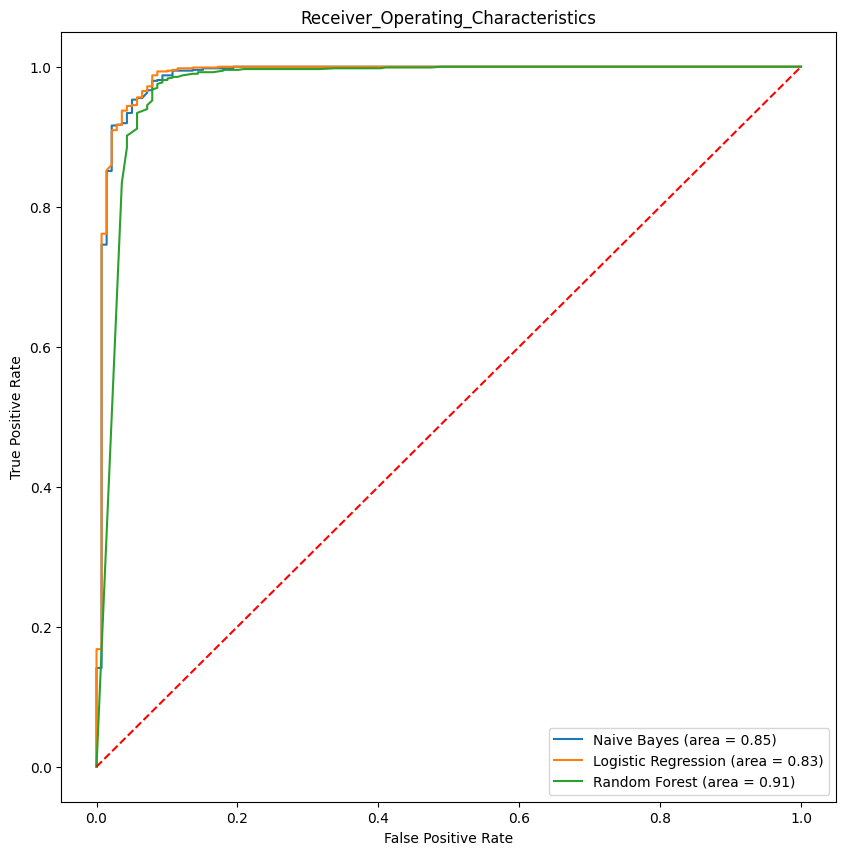

In [26]:
plt.figure(figsize = (10, 10))
plt.plot(fpr, tpr, label = "Naive Bayes (area = %0.2f)" %log_roc_auc_naive)
plt.plot(fpr2, tpr2, label = "Logistic Regression (area = %0.2f)" %log_roc_auc_logit)
plt.plot(fpr3, tpr3, label = "Random Forest (area = %0.2f)" %log_roc_auc_randomf)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title('Receiver_Operating_Characteristics')
plt.legend(loc = "lower right")
plt.savefig('Log_ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('Log_ROC')
plt.show()